<a href="https://colab.research.google.com/github/fedhere/MLTSA22_FBianco/blob/main/Lab5GP/interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pylab as pl
import pandas as pd

In [4]:
np.random.seed(123)

In [5]:
t = np.arange(30)
y = np.random.randn(30) * 2

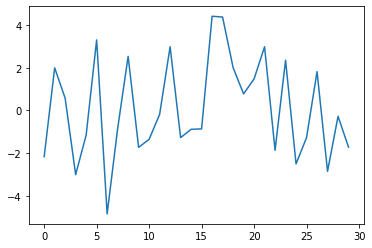

In [6]:
pl.plot(t,y);

In [7]:
ymissing = y.copy()
ymissing[np.random.randint(0,30,10)] = np.nan

In [8]:
df = pd.DataFrame({'t':t, 'y':ymissing})

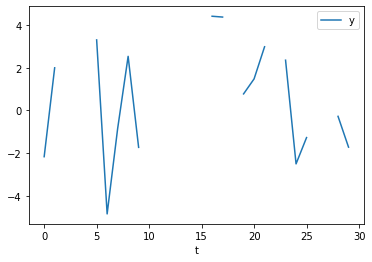

In [9]:
df.plot(x='t', y='y');

In [10]:
true_mean = y.mean()
true_std = y.std()
print("true mean {:.2f}; true st.dev. {:.2f} ".format(true_mean, true_std))

true mean 0.09; true st.dev. 2.33 


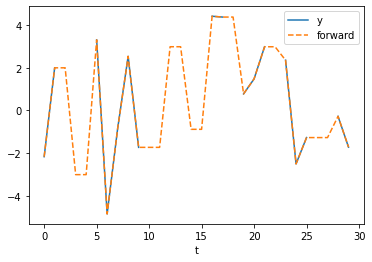

In [11]:
ax = df.plot(x='t', y='y');
df.fillna(method="ffill").plot(x='t', y='y', ls ='--', ax=ax, label="forward");

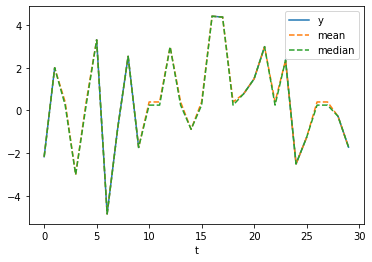

In [12]:
ax = df.plot(x='t', y='y');
df.fillna(value=df.y.mean()).plot(x='t', y='y', ls ='--', ax=ax, label="mean");
df.fillna(value=df.y.median()).plot(x='t', y='y', ls ='--', ax=ax, label="median");


In [13]:
print("true mean {:.2f}; true st.dev. {:.2f} ".format(true_mean, true_std))
print("method: mean - mean {:.2f} stdev {:.2f}".format(
    df.fillna(value=df.y.mean()).y.mean(), 
                     df.fillna(value=df.y.mean()).y.std()))
print("method: median - mean {:.2f} stdev {:.2f}".format(
    df.fillna(value=df.y.median()).y.mean(), 
                     df.fillna(value=df.y.median()).y.std()))

true mean 0.09; true st.dev. 2.33 
method: mean - mean 0.39 stdev 2.16
method: median - mean 0.34 stdev 2.16


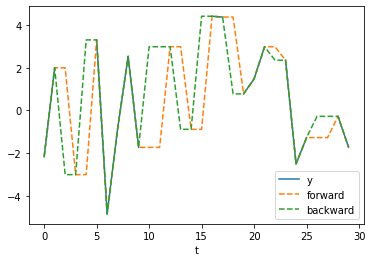

In [14]:
ax = df.plot(x='t', y='y');
df.fillna(method="ffill").plot(x='t', y='y', ls ='--', ax=ax, label="forward");
df.fillna(method="bfill").plot(x='t', y='y', ls ='--', ax=ax, label="backward");

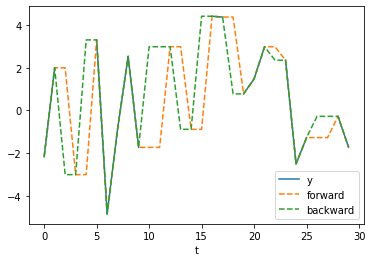

In [15]:
ax = df.plot(x='t', y='y');
df.fillna(method="ffill").plot(x='t', y='y', ls ='--', ax=ax, label="forward");
df.fillna(method="bfill").plot(x='t', y='y', ls ='--', ax=ax, label="backward");

In [16]:
print("true mean {:.2f}; true st.dev. {:.2f} ".format(true_mean, true_std))
print("ffill mean {:.2f} stdev {:.2f}".format(df.fillna(method="ffill").y.mean(), 
                     df.fillna(method="ffill").y.std()))
print("bfill mean {:.2f} stdev {:.2f}".format(df.fillna(method="bfill").y.mean(), 
                     df.fillna(method="bfill").y.std()))

true mean 0.09; true st.dev. 2.33 
ffill mean 0.34 stdev 2.60
bfill mean 0.67 stdev 2.56


In [77]:
from sklearn.datasets import fetch_openml

co2 = fetch_openml(data_id=41187, as_frame=True)
co2.frame.head()

,year,month,day,weight,flag,station,co2
0,1958.0,3.0,29.0,4.0,0.0,MLO,316.1
1,1958.0,4.0,5.0,6.0,0.0,MLO,317.3
2,1958.0,4.0,12.0,4.0,0.0,MLO,317.6
3,1958.0,4.0,19.0,6.0,0.0,MLO,317.5
4,1958.0,4.0,26.0,2.0,0.0,MLO,316.4


In [78]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
co2 = pd.DataFrame(co2.frame)

In [80]:
co2['co2nan'] = co2['co2'].copy()
co2['co2nan'][np.random.randint(0,2225,100)] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
co2.isna().sum(axis=0)

year        0
month       0
day         0
weight      0
flag        0
station     0
co2         0
co2nan     98
dtype: int64

In [82]:
co2.columns

Index(['year', 'month', 'day', 'weight', 'flag', 'station', 'co2', 'co2nan'], dtype='object')

In [83]:
knny = imputer.fit_transform(co2[['year', 'month', 'day', 'weight', 'flag', 'station', 'co2nan']].values)
knny.shape

KeyError: ignored

In [84]:
co2['station'] = pd.Categorical(co2.station)
co2['station'] = co2.station.cat.codes
co2.head()


,year,month,day,weight,flag,station,co2,co2nan
0,1958.0,3.0,29.0,4.0,0.0,0,316.1,316.1
1,1958.0,4.0,5.0,6.0,0.0,0,317.3,NaN
2,1958.0,4.0,12.0,4.0,0.0,0,317.6,317.6
3,1958.0,4.0,19.0,6.0,0.0,0,317.5,317.5
4,1958.0,4.0,26.0,2.0,0.0,0,316.4,316.4


In [85]:
co2.describe()

,year,month,day,weight,flag,station,co2,co2nan
count,2225.000000,2225.000000,2225.000000,2225.000000,2225.0,2225.0,2225.000000,2127.00000
mean,1980.026067,6.568989,15.725393,5.816180,0.0,0.0,340.142247,340.16535
std,12.495512,3.451596,8.796644,1.381698,0.0,0.0,17.003885,17.01450
min,1958.000000,1.000000,1.000000,1.000000,0.0,0.0,313.000000,313.00000
25%,1969.000000,4.000000,8.000000,5.000000,0.0,0.0,324.800000,324.80000
50%,1980.000000,7.000000,16.000000,6.000000,0.0,0.0,338.300000,338.30000
75%,1991.000000,10.000000,23.000000,7.000000,0.0,0.0,354.800000,354.90000
max,2001.000000,12.000000,31.000000,7.000000,0.0,0.0,373.900000,373.90000


In [86]:
knnco2 = imputer.fit_transform(co2[['year', 'month', 'day', 'weight', 'flag', 'station', 'co2nan']].values)
knnco2.shape

(2225, 7)

In [87]:
co2['date'] = pd.to_datetime(["%d %d %d"%(co2.iloc[i].year,
                            co2.iloc[i].month,
                            co2.iloc[i].day) for i in co2.index])

In [88]:
co2['date'] = (co2['date'] - co2['date'][0]).dt.days

In [89]:
knnco2 = imputer.fit_transform(co2[["date", "weight", "flag", "co2nan"]])
knnco2.shape

(2225, 4)

In [90]:
co2['co2filled'] = knnco2[:,-1]

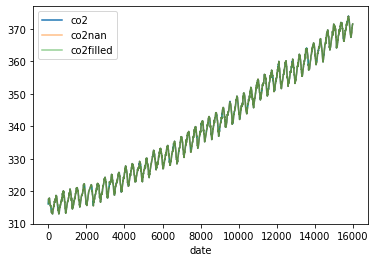

In [94]:
ax = co2.plot(x="date", y="co2")
co2.plot(x="date", y="co2nan", alpha=0.5, ax=ax)
co2.plot(x="date", y="co2filled", alpha=0.5, ax=ax)


In [97]:
co2["co2filled"] += 1

(310.0, 325.0)

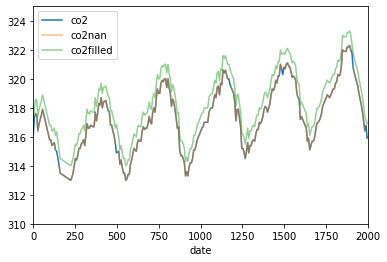

In [99]:
ax = co2.plot(x="date", y="co2")
co2.plot(x="date", y="co2nan", alpha=0.5, ax=ax)
co2.plot(x="date", y="co2filled", alpha=0.5, ax=ax)
pl.xlim(0,2000)
pl.ylim(310,325)

In [105]:
((co2.co2 - co2.co2filled + 1)**2).sum() / co2.shape[0]

0.006042696629213694

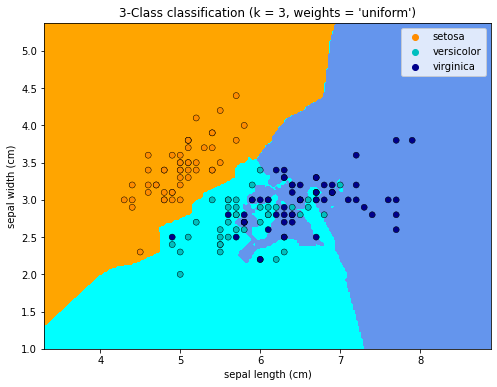

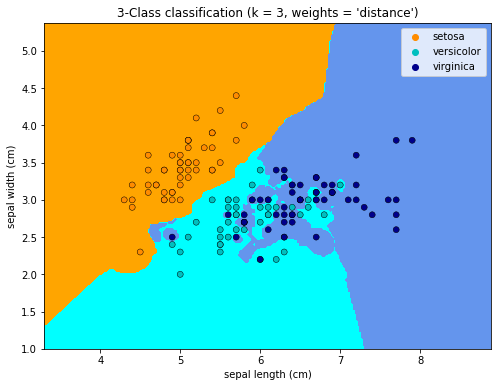

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 3

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()